<a href="https://colab.research.google.com/github/KatBotkowska/CodersCrew/blob/master/StackOverFlow_zadanie_2_grupa_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# StackOverFlow - analiza zawartości serwisu
## CodersCrew - grupa 5


### Importy

In [0]:
import numpy as np
import pandas as pd
import plotly.plotly as py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import re

# Dane na temat użytkowników z Polski

In [0]:
queryPol_users = """SELECT location,
  COUNT(*) AS Users_location
FROM
  `bigquery-public-data.stackoverflow.users`
WHERE location LIKE '%Poland%' OR location LIKE '%Polska%' #collate Polish_CS_AI
GROUP BY
  location
ORDER BY
  Users_location DESC, location DESC"""

## Ilość użytkowników,  którzy jako lokalizację deklarują Polskę

In [0]:
dfPol_users = pd.read_gbq(query = queryPol_users, project_id = 'it-job-market-project-cc', dialect = 'standard')
dfPol_users.loc[dfPol_users['location'].str.contains('Poland|Polska', case = False), 'location'] = 'Poland'
dfPol_users.groupby('location')['Users_location'].sum()

location
Poland    33917
Name: Users_location, dtype: int64

## Dane na temat użytkowników, którzy jako lokalizację deklarują Polskę

In [0]:
query2 = """SELECT display_name, user_exper, location, reputation, Last_Access_Year, up_votes, down_votes, id
FROM 
  (SELECT display_name, creation_date, location,reputation, up_votes, down_votes, id,
  DATE_DIFF(CURRENT_DATE, DATE(creation_date),  YEAR) AS user_exper,
  EXTRACT(YEAR FROM last_access_date) AS Last_Access_Year
  FROM `bigquery-public-data.stackoverflow.users` users
  )
WHERE (location LIKE '%Poland%' OR location LIKE '%Polska%') and user_exper>1 and reputation>1
ORDER BY reputation DESC, user_exper DESC
LIMIT 20;"""

In [0]:
df2 = pd.read_gbq(query = query2, project_id = 'it-job-market-project-cc', dialect = 'standard', index_col = 'display_name')

### *20 użytkowników z Polski o największej reputacji*

In [0]:
df2.sort_values(by='reputation', ascending = False)

,user_exper,location,reputation,Last_Access_Year,up_votes,down_votes,id
display_name,,,,,,,
Wiktor Stribiżew,5,"Warsaw, Poland",320105,2019,13006,29017,3832970
Tomasz Nurkiewicz,8,"Warsaw, Poland",269738,2017,4949,70,605744
Jakub Narębski,11,"Toruń, Kuiavia-Pomerania Poland",214704,2019,1429,41,46058
Lennart Regebro,10,"Wroclaw, Poland",112487,2018,3708,953,126214
hsz,10,"Szczecin, Poland",106514,2019,1730,252,223386
Pshemo,7,Poland,95198,2019,7488,6827,1393766
Tadeck,9,"Warsaw, Poland",91068,2019,2849,412,548696
Marcin Nabiałek,5,"Poland, Częstochowa",72686,2019,841,1266,3593996
rsp,8,"Warsaw, Poland",66786,2019,1858,112,613198


## *Od czego zależy reputacja na StackOverflow w przypadku użytkowników deklarujących pochodzenie z Polski - analiza korelacji dla doświadczenia użytkowników oraz daty ostatniego logowania*

In [0]:
df2[['user_exper', 'reputation']].corr()

,user_exper,reputation
user_exper,1.000000,-0.246248
reputation,-0.246248,1.000000


In [0]:
df2[['Last_Access_Year', 'reputation']].corr()

,Last_Access_Year,reputation
Last_Access_Year,1.000000,-0.402931
reputation,-0.402931,1.000000


*Pomiędzy doświadczeniem użytkowników, rozumianym jako okres od założenia konta na StackOverflow, a ich reputacją (rozumianą jako ilość puntów przyznawanych przez innych użytkowników serwisu za zadawane pytania i podawane odpowiedzi) korelacja jest ujemna, a jej poziom świadczy, że jest słaba. Widać to też na danych w  poniższych tabelach - użytkownicy o nawiększej reputacji, wcale nie są osobami z najdłuższym okresem przebywania na serwisie. Bardziej istotne jest tutaj zaangażowanie uczestników, które widać jako datę ostatniego logowania, chociaż i w tym przypadku współczynnik korelacji nie jest bardziej znaczący, a siłę korelacji można ocenić jako przeciętną - również ujemną.*

## *Dane o użytkownikach z Polski z najwyższą reputacją*

In [0]:
df_users_Pol = df2[['user_exper', 'reputation', 'Last_Access_Year']]
df_users_Pol.sort_values(by= 'reputation', ascending = False)[0:10]

,user_exper,reputation,Last_Access_Year
display_name,,,
Wiktor Stribiżew,5,320105,2019
Tomasz Nurkiewicz,8,269738,2017
Jakub Narębski,11,214704,2019
Lennart Regebro,10,112487,2018
hsz,10,106514,2019
Pshemo,7,95198,2019
Tadeck,9,91068,2019
Marcin Nabiałek,5,72686,2019
rsp,8,66786,2019


## *Aktywność użytkowników  z Polski rozumiana jako data ostatniego logowania do serwisu.*

*W przypadku roku 2019, dane podane są za I kwartał.*

In [0]:
queryUsers_Act = """SELECT
  EXTRACT(YEAR FROM last_access_date) AS Year,
  COUNT(*) AS Users_Activity
FROM
  `bigquery-public-data.stackoverflow.users`
WHERE location LIKE '%Poland%' OR location LIKE '%Polska%'
GROUP BY
  Year
HAVING
  Year > 2008 AND Year <= 2019
ORDER BY
  Year
LIMIT 100"""

In [0]:
dfUsers_Act = pd.read_gbq(query = queryUsers_Act, project_id = 'it-job-market-project-cc', dialect = 'standard')
dfUsers_Act.set_index('Year')

,Users_Activity
Year,
2009,16
2010,47
2011,89
2012,162
2013,354
2014,582
2015,743
2016,1103
2017,5389


<Figure size 144x144 with 0 Axes>

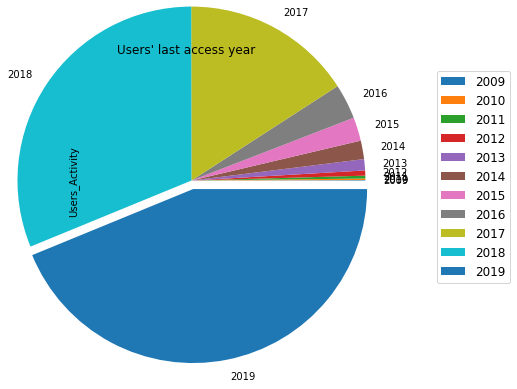

<Figure size 144x144 with 0 Axes>

In [0]:
explode = (0,0,0,0,0,0,0,0,0,0,0.1)
dfUsers_Act.set_index('Year').plot(kind = 'pie', title = 'Users\' last access year', subplots=True, radius=2, explode=explode)
plt.legend(loc = 'lower left', fontsize = 12, bbox_to_anchor=(1.6, 0))
plt.figure(figsize=(2, 2))



*Zaangażowanie użytkowników serwisu można również cześciowo ocenić na podstawie dat ostatnich logowań. W przypadku użytkowników z Polski, prawie połowa z nich logowała się w I kwartale tego roku, co świadczy o ich aktywnosci na serwisie. Dodając do tego osoby logujące się w 2018 r., to już prawie 3/4 użytkowników z Polski. Świadczy to o dużym zaangażowaniu użytkowników w wymianę informacji na portalu.*

##*Liczba utworzonych kont w podziale na lata, dla ktorych użytkownicy deklarują lokalizację jako Polskę*
*W przypadku 2019 r. dane są za I kwartał*

In [0]:
queryUsers_creation = """SELECT
  EXTRACT(YEAR FROM creation_date) AS Year,
  COUNT(*) AS Number_Created_Account
FROM
  `bigquery-public-data.stackoverflow.users`
WHERE location LIKE '%Poland%' OR location LIKE '%Polska%'  
GROUP BY
  Year
HAVING
  Year > 2008 AND Year <= 2019
ORDER BY
  Year"""

In [0]:
dfUsers_creation = pd.read_gbq(query = queryUsers_creation, project_id = 'it-job-market-project-cc', dialect = 'standard')
dfUsers_creation.set_index('Year')

,Number_Created_Account
Year,
2009,434
2010,813
2011,1285
2012,2041
2013,2590
2014,2758
2015,2281
2016,3656
2017,8643


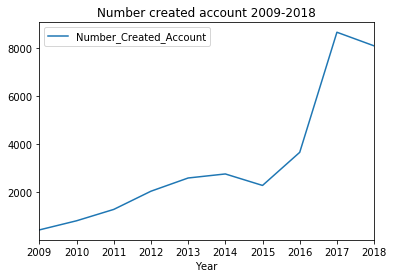

In [0]:
dfUsers_creation[0:10].plot(kind = 'line', x = 'Year', y = 'Number_Created_Account', title = 'Number created account 2009-2018')

*Z wykresu widać, że do roku 2017 stale rosła liczba tworzonych kont użytkowników z Polski na serwisie. Największy przyrost miał miejsce między 2016 a 2017 r., gdzie wzrost był ponad dwukrotny. Po roku 2017 widać delikatny spadek w ilości tworzonych kont, co mogą też potwierdzić dane za I kwartał 2019r. Mogą one wskazywać na kolejny rok spadku ilości tworzonych kont.*

## *Jakie zagadnienia interesują użytkowników z Polski -wg tagów z zadawanych pytań*

In [0]:
query3 = """SELECT posts_questions.id, posts_questions.creation_date, owner_user_id, score, tags
FROM `bigquery-public-data.stackoverflow.posts_questions` posts_questions
JOIN
  `bigquery-public-data.stackoverflow.users` users
ON posts_questions.owner_user_id = users.id
WHERE users.location like '%Poland%' OR users.location like '%Polska%'"""


In [0]:
df3 = pd.read_gbq(query = query3, project_id = 'it-job-market-project-cc', dialect = 'standard')
tags = ' '.join(df3.tags).lower()
pdTags = pd.DataFrame(re.split(r'[| ]', tags))
pdTags1 = pd.DataFrame(pdTags.groupby(0)[0].count().sort_values(ascending = False).head(10))
pdTags1

,0
0,
java,11510
javascript,10303
c#,9711
android,6800
php,6038
python,5564
c++,5466
jquery,4014
html,3539


<Figure size 144x144 with 0 Axes>

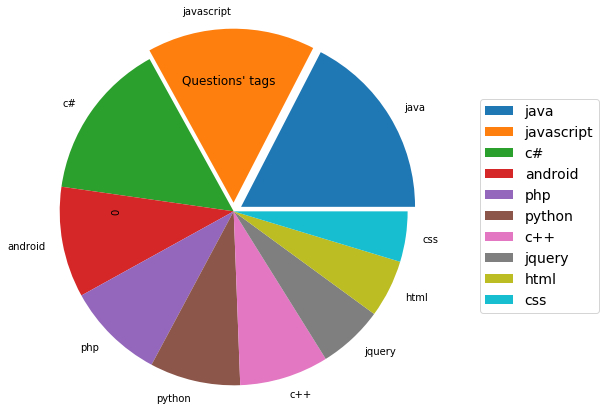

<Figure size 144x144 with 0 Axes>

In [0]:
explode = (0.1,0.1,0,0,0,0,0,0,0,0)
pdTags1.plot(kind = 'pie', title = 'Questions\' tags', subplots=True, radius=2, explode=explode)
plt.legend(loc = 'lower left', fontsize = 14, bbox_to_anchor=(1.6, 0))
plt.figure(figsize=(2, 2))
#plt.title('Questions\' tags',y=0.1)

*Wśród użytkowników z Polski, najwięcej zadawanych pytań dotyczy javy, która dzięki temu wysuwa się na prowadzenie jeśli chodzi o popularność języka, ale też jako język sprawiający najwięcej problemów, skutkujących szukaniem odpowiedzi na StackOverflow. JavaScript oraz C# są porównywalne pod kątem ilości tagów wśród polskich użytkowników.*

## *Najbardziej popularne tagi wśród użytkowników z Polski od 2018 r.*

In [0]:
queryTagsYears = """SELECT posts_questions.id, EXTRACT(YEAR FROM posts_questions.creation_date) AS Year, owner_user_id, score, tags
FROM `bigquery-public-data.stackoverflow.posts_questions` posts_questions
JOIN
  `bigquery-public-data.stackoverflow.users` users
ON posts_questions.owner_user_id = users.id
WHERE (users.location like '%Poland%' OR users.location like '%Polska%') and EXTRACT(YEAR FROM posts_questions.creation_date) >= 2018 
"""


In [0]:
dfTagsYears = pd.read_gbq(query = queryTagsYears, project_id = 'it-job-market-project-cc', dialect = 'standard')
tagsY = ' '.join(dfTagsYears.tags).lower()
pdTagsY = pd.DataFrame(re.split(r'[| ]', tagsY))
pdTagsY1 = pd.DataFrame(pdTagsY.groupby(0)[0].count().sort_values(ascending = False).head(10))
pdTagsY1

,0
0,
javascript,2317
java,2297
c#,1421
python,1408
android,1130
php,837
c++,745
html,714
reactjs,688


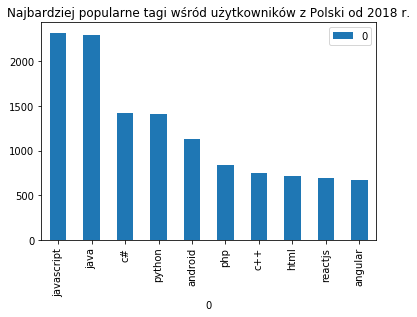

In [0]:
pdTagsY1.plot(kind = 'bar', title = 'Najbardziej popularne tagi wśród użytkowników z Polski od 2018 r.')

*Wśród zadawanych pytań najczęściej tagowane są pytania dot. javy i java script. Kolejne języki, które pojawiają się w pytaniach, to c# oraz python, jednak ilościowo wypadają gorzej od javascript i javy.*

## *Ilość pytań zadawanych przez polskich użytkowników i odpowiedzi na ich pytania w podziale  na lata*

In [0]:
queryQAPol = """SELECT 
EXTRACT(YEAR FROM posts_questions.creation_date) AS Year,
  COUNT(*) AS Number_of_Questions,
  SUM(answer_count) AS Number_of_Answers
FROM
  `bigquery-public-data.stackoverflow.posts_questions` posts_questions
JOIN
  `bigquery-public-data.stackoverflow.users` users
ON posts_questions.owner_user_id = users.id
WHERE users.location like '%Poland%' OR users.location like '%Polska%'
GROUP BY
  Year
HAVING
  Year > 2008 AND Year <= 2019
ORDER BY
  Year"""

In [0]:
dfQAPol = pd.read_gbq(query = queryQAPol, project_id = 'it-job-market-project-cc', dialect = 'standard')
dfQAPol.set_index('Year')

,Number_of_Questions,Number_of_Answers
Year,,
2009,1746,6028
2010,3771,9295
2011,6179,12971
2012,8736,15508
2013,11089,18225
2014,11463,16439
2015,11746,15902
2016,11905,15240
2017,14835,18270


Text(0.5, 1.0, 'Ilość pytań zadawanych przez użytkowników z Polski \n oraz odpowiedzi na nie w podziale na lata')

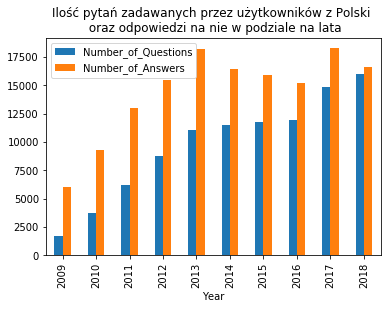

In [0]:
dfQAPol[0:10].set_index('Year').plot(kind = 'bar')
plt.title('Ilość pytań zadawanych przez użytkowników z Polski \n oraz odpowiedzi na nie w podziale na lata')


## *Ilość odpowiedzi, dla których deklarowanym użytkownikiem jest Polak w podziale na lata*

In [0]:
queryA = """SELECT 
EXTRACT(YEAR FROM posts_answers.creation_date) AS Year,
  COUNT(*) AS Number_of_Answers
FROM
  `bigquery-public-data.stackoverflow.posts_answers` posts_answers
JOIN
  `bigquery-public-data.stackoverflow.users` users
ON posts_answers.owner_user_id = users.id
WHERE users.location like '%Poland%' OR users.location like '%Polska%'
GROUP BY
  Year
HAVING
  Year > 2008 AND Year <= 2019
ORDER BY
  Year"""

In [0]:
dfA = pd.read_gbq(query = queryA, project_id = 'it-job-market-project-cc', dialect = 'standard')
dfA.set_index('Year')

,Number_of_Answers
Year,
2009,5708
2010,11982
2011,18753
2012,24961
2013,36136
2014,34430
2015,37163
2016,39333
2017,36823


Text(0.5, 1.0, 'Ilość odpowiedzi, dla których właścicielem jest użytkownik z Polski \n  w podziale na lata')

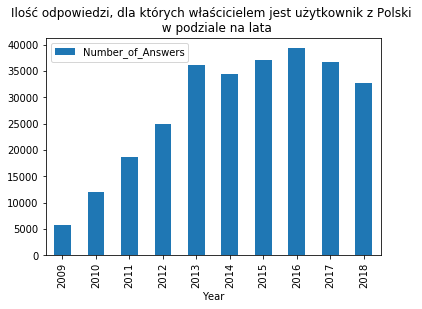

In [0]:
dfA[0:10].set_index('Year').plot(kind = 'bar')
plt.title('Ilość odpowiedzi, dla których właścicielem jest użytkownik z Polski \n  w podziale na lata')

*Wraz ze wzrostem ilości użytkowników deklarujących swoje pochodzenie z Polski rośnie również ilość zadawanych przez nich pytań oraz wrzucanych postów z odpowiedziami. Skokowy wzrost ilości użytkowników z Polski pomiędzy 2016 a 2017 r. nie przełożył się na równie duży wzrost ilości pytań. Pomiędzy 2017 a 2018 r. widać spadek ilości zadawanych pytań, co również mogą potwierdzić niska wartość ilości zadanych pytań w I kw. 2019 r.*

# Dane użytkowników StackOverflow

## Zestawienie danych użytkowników

In [0]:
query11 = """SELECT display_name, location, user_exper, reputation, up_votes, down_votes, Last_Access_Year, id
FROM 
  (SELECT display_name, creation_date, location,reputation, up_votes, down_votes, id,
  DATE_DIFF(CURRENT_DATE, DATE(creation_date),  YEAR) AS user_exper, 
  EXTRACT(YEAR FROM last_access_date) AS Last_Access_Year
  FROM `bigquery-public-data.stackoverflow.users` users
  )
ORDER BY reputation DESC
LIMIT 100"""

In [0]:
df11 = pd.read_gbq(query = query11, project_id = 'it-job-market-project-cc', dialect = 'standard')
df11

,display_name,location,user_exper,reputation,up_votes,down_votes,Last_Access_Year,id
0,Jon Skeet,"Reading, United Kingdom",11,1089674,16323,6843,2019,22656
1,BalusC,"Willemstad, Curaçao",10,852319,15343,21024,2019,157882
2,Darin Dimitrov,"Sofia, Bulgaria",11,845003,1952,2651,2019,29407
3,VonC,France,11,844623,47433,265,2019,6309
4,Hans Passant,"Madison, WI",11,791930,9941,54486,2019,17034
5,Marc Gravell,"Forest of Dean, United Kingdom",11,787580,24310,1069,2019,23354
6,Gordon Linoff,"New York, United States",7,781146,12450,41,2019,1144035
7,CommonsWare,"Pennsylvania, United States",10,775043,10252,6676,2019,115145
8,Martijn Pieters,"Cambridge, UK",10,715515,5696,17999,2019,100297
9,T.J. Crowder,United Kingdom,10,690167,10797,24756,2019,157247


## *Analiza pochodzenia użytkowników StackOverflow wg deklarowanych lokalizacji*

In [0]:
query9 = """SELECT location,
  COUNT(*) AS Users_location
FROM
  `bigquery-public-data.stackoverflow.users`
GROUP BY
  location
ORDER BY
  Users_location DESC, location DESC
LIMIT 100"""

In [0]:
#trzeba wyczyścić dane, gdyż użytkownicy te same miejsca oznaczają w różny sposób
df9 = pd.read_gbq(query = query9, project_id = 'it-job-market-project-cc', dialect = 'standard')
list(df9['location'].unique())

['',
 'India',
 'Bangalore, Karnataka, India',
 'Germany',
 'Hyderabad, Telangana, India',
 'Pune, Maharashtra, India',
 'Chennai, Tamil Nadu, India',
 'China',
 'London, United Kingdom',
 'United States',
 'France',
 'Mumbai, Maharashtra, India',
 'Paris, France',
 'USA',
 'Bengaluru, Karnataka, India',
 'Philippines',
 'United Kingdom',
 'Indonesia',
 'Canada',
 'Singapore',
 'Delhi, India',
 'Netherlands',
 'Israel',
 'Russia',
 'Pakistan',
 'Bangalore, India',
 'Egypt',
 'Brazil',
 'Ahmedabad, Gujarat, India',
 'Poland',
 'Toronto, ON, Canada',
 'Iran',
 'New Delhi, Delhi, India',
 'UK',
 'New York, NY, United States',
 'Australia',
 'Moscow, Russia',
 'Dhaka, Bangladesh',
 'London, UK',
 'Ukraine',
 'Noida, Uttar Pradesh, India',
 'Italy',
 'Berlin, Germany',
 'Sweden',
 'Vietnam',
 'Malaysia',
 'Spain',
 'Belgium',
 'Kolkata, West Bengal, India',
 'Beijing, China',
 'Chennai, India',
 'Bangladesh',
 'Bangalore',
 'San Francisco, CA',
 'San Francisco, CA, United States',
 'Switzer

In [0]:
df9.loc[df9['location'].str.contains('India|Bangalore|Pune|Chennai|Delhi', case = False), 'location'] = 'India'
df9.loc[df9['location'].str.contains('United States|USA|California|CA|WA|MA|TX|NY|GA|Texas|OR|New York|CO|TX|PA|MN|San Francisco|MI|FL|Boise', case = False), 'location'] = 'United States'
df9.loc[df9['location'].str.contains('United Kingdom|UK|England|Durham|London', case = False), 'location'] = 'United Kingdom'
df9.loc[df9['location'].str.contains('France|Paris', case = False), 'location'] = 'France'
df9.loc[df9['location'].str.contains('Canada', case = False), 'location'] = 'Canada'
df9.loc[df9['location'].str.contains('China|Shi|Hong Kong|Taiwan|Beijing|Shanghai', case = False), 'location'] = 'China'
df9.loc[df9['location'].str.contains('Germany|Deutschland|berlin', case = False), 'location'] = 'Germany'
df9.loc[df9['location'].str.contains('Russia|Moscow|Moskva', case = False), 'location'] = 'Russia'
df9.loc[df9['location'].str.contains('Bangladesh', case = False), 'location'] = 'Bangladesh'
df9.loc[df9['location'].str.contains('Türkiye|Turkey', case = False), 'location'] = 'Turkey'
df9.loc[df9['location'].str.contains('Pakistan', case = False), 'location'] = 'Pakistan'
df9.loc[df9['location'].str.contains('Sweden|Sverige', case = False), 'location'] = 'Sweden'
df9.loc[df9['location'].str.contains('Netherlands', case = False), 'location'] = 'Netherlands'
df9.loc[df9['location'].str.contains('Romania', case = False), 'location'] = 'Romania'
df9.loc[df9['location'].str.contains('Indonesia', case = False), 'location'] = 'Indonesia'
df9.loc[df9['location'].str.contains('Nigeria', case = False), 'location'] = 'Nigeria'
df9.loc[df9['location'].str.contains('Ireland', case = False), 'location'] = 'Ireland'
df9.loc[df9['location'].str.contains('Poland|Polska', case = False), 'location'] = 'Poland'
df9.loc[df9['location'].str.contains('Japan', case = False), 'location'] = 'Japan'
df9.loc[df9['location'].str.contains('Australia', case = False), 'location'] = 'Australia'
df9.loc[df9['location'].str.contains('South Korea|Seoul', case = False), 'location'] = 'South Korea'
df9.loc[df9['location'].str.contains('Spain|España', case = False), 'location'] = 'Spain'
df9.loc[df9['location'].str.contains('Belarus', case = False), 'location'] = 'Belarus'
df9.loc[df9['location'].str.contains('New Zealand', case = False), 'location'] = 'New Zealand'
df9.loc[df9['location'].str.contains('Brasil|Rio de Janeiro', case = False), 'location'] = 'Brasil'
list(df9['location'].unique())

['',
 'India',
 'United States',
 'China',
 'United Kingdom',
 'France',
 'Philippines',
 'Indonesia',
 'Netherlands',
 'Israel',
 'Russia',
 'Egypt',
 'Brazil',
 'Poland',
 'Iran',
 'Australia',
 'Bangladesh',
 'Italy',
 'Sweden',
 'Vietnam',
 'Belgium',
 'Switzerland',
 'Turkey',
 'Sri Lanka',
 'Brasil',
 'Việt Nam',
 'Nigeria',
 'Ireland',
 'Argentina']

In [0]:
df9Country = df9.groupby('location')['Users_location'].sum()
df9Country = pd.DataFrame(df9Country.sort_values(ascending = False)).reset_index()
df9Country.loc[0, 'location'] = 'No declaration'
df9Country

,location,Users_location
0,No declaration,7600342
1,India,289943
2,United States,241878
3,United Kingdom,62911
4,China,45765
5,Bangladesh,18747
6,Turkey,18690
7,France,16674
8,Indonesia,16045
9,Netherlands,15411


<Figure size 144x144 with 0 Axes>

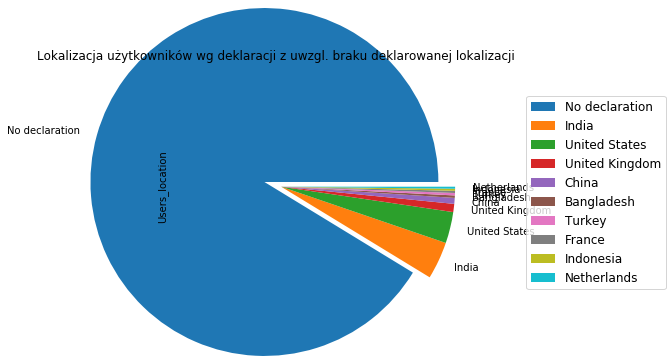

<Figure size 144x144 with 0 Axes>

In [0]:
explode = (0.2,0,0,0,0,0,0,0,0,0)
df9Country.set_index('location')[0:10].plot(kind = 'pie', title = 'Lokalizacja użytkowników wg deklaracji z uwzgl. braku deklarowanej lokalizacji', subplots=True, radius=2, explode = explode)
plt.legend(loc = 'lower left', fontsize = 12, bbox_to_anchor=(1.6, 0))
plt.figure(figsize=(2, 2))

<Figure size 144x144 with 0 Axes>

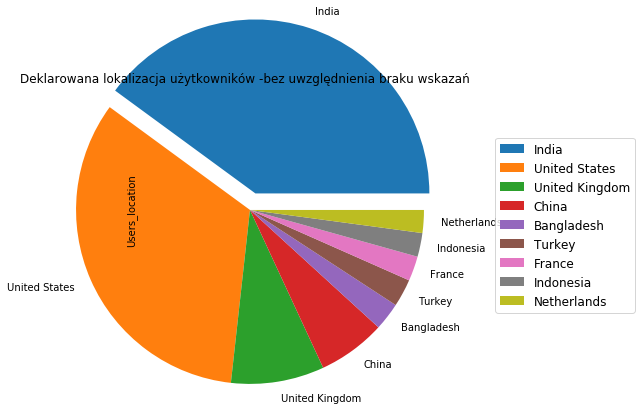

<Figure size 144x144 with 0 Axes>

In [0]:
explode = (0.2,0,0,0,0,0,0,0,0)
df9Country.set_index('location')[1:10].plot(kind = 'pie', title = 'Deklarowana lokalizacja użytkowników -bez uwzględnienia braku wskazań', subplots=True, radius=2, explode = explode)
plt.legend(loc = 'lower left', fontsize = 12, bbox_to_anchor=(1.6, 0))
plt.figure(figsize=(2, 2))

*Z danych wynika, że większość użytkowników (prawie 80 % zarejestrowanych użytkowników StackOverflow) nie deklaruje kraju, z którego pochodzi. Spośród użytkowników wskazujących swój kraj pochodzenia, najwięcej osób pochodzi z Indii, kolejne są Stany Zjednoczone oraz Wielka Brytania. Brak danych na temat lokalizacji dla tak dużej ilości użytkowników świadczy o tym, że w obecnym świecie, użytkownicy po pierwsze nie uznają za istotne podawać lokalizację przy rejestrowaniu się do tego typu portalu. Ważna jest też dla nich ochrona swojej prywatnosci. Brak danych na temat lokalizacji dla tak znaczącej ilości użytkowników prowadzi do zafałszowania wniosków wynikających z analiz przeprowadzanych przy wzięciu pod uwagę tego kryterium. Dlatego wszystkie analizy przeprowadzane powyżej dla użytkowników pochodzących z Polski nie mogą być miarodajne.* 


## *Od czego zależy reputacja na StackOverflow - analiza korelacji dla doświadczenia użytkowników oraz daty ostatniego logowania*

In [0]:
df11[['user_exper', 'reputation']].corr()

,user_exper,reputation
user_exper,1.000000,0.245727
reputation,0.245727,1.000000


In [0]:
df11[['Last_Access_Year', 'reputation']].corr()

,Last_Access_Year,reputation
Last_Access_Year,1.000000,0.104541
reputation,0.104541,1.000000


*Analiza korelacji pomiędzy reputacją wszystkich użytkowników StackOverflow, a ich doświadczeniem na portalu oraz datą ostatniego logowania prowadzi do innych wyników niż te, które otrzymano dla użytkowników z Polski. W pierwszej analizie, siła korelacji dla użytkowników z Polski to -0,2462. W obu przypadkach korelacja nie jest znacząca, ale jej kierunek jest zupełnie inny. Dla drugiej analizy (reputacja a data ostatniego logowania na serwisie), w przypadku brania pod uwagę jedynie użytkowników z Polski, korelacja jest silniejsza i również ma inny kierunek (-0,40). Z danych dla wszystkich użytkowników wynika, że korelacja pomiędzy datą ostatniego logowania na serwisie a reputacją użytkowników nie jest znacząca.*

## *Dane użytkowników o największej reputacji*

In [0]:
dfAll_users = df11.set_index('display_name')[['user_exper', 'reputation', 'Last_Access_Year']]
dfAll_users.sort_values(by= 'reputation',  ascending = False)[0:20]

,user_exper,reputation,Last_Access_Year
display_name,,,
Jon Skeet,11,1089674,2019
BalusC,10,852319,2019
Darin Dimitrov,11,845003,2019
VonC,11,844623,2019
Hans Passant,11,791930,2019
Marc Gravell,11,787580,2019
Gordon Linoff,7,781146,2019
CommonsWare,10,775043,2019
Martijn Pieters,10,715515,2019


*Użytkownicy, którzy mają nawięcej zdobytych punktów 'reputacji' są użytkownikami z największym stażem na StackOverflow. Jednocześnie z danych wynika, że są to użytkownicy aktywni na serwisie, bo ich ostatnie logowania na serwisie miały miejsce w I kwartale 2019 r.*

## *Kiedy najwięcej użytkowników założyło konta na StackOverflow.* 
*w przypadku 2019 r. dane za I kwartał*


In [0]:
query7 = """SELECT
  EXTRACT(YEAR FROM creation_date) AS Year,
  COUNT(*) AS Number_of_Created_Accounts
FROM
  `bigquery-public-data.stackoverflow.users`
GROUP BY
  Year
HAVING
  Year > 2008 AND Year <= 2019
ORDER BY
  Year"""

In [0]:
df7 = pd.read_gbq(query = query7, project_id = 'it-job-market-project-cc', dialect = 'standard')
df7.set_index('Year')

,Number_of_Created_Accounts
Year,
2009,78131
2010,199489
2011,359376
2012,680359
2013,1125231
2014,1178466
2015,1257128
2016,1522151
2017,1735015


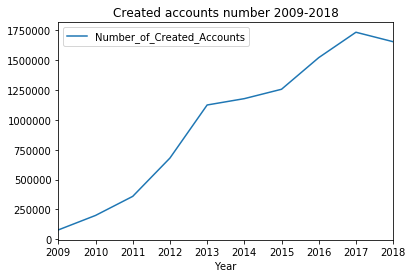

In [0]:
df7[0:10].plot(kind = 'line', x = 'Year', y = 'Number_of_Created_Accounts', title = 'Created accounts number 2009-2018')


2019 r. Dane za I kwartał

*Z danych wynika, że liczba tworzonych kont na serwisie systematycznie rośnie. Pomiędzy 2017 a 2018 widać delikatny spadek, który może się również utrzymywać w 2019 r. (dane za I kwartał mogą potwierdzać tę tendencję).*

## *Aktywność użytkowników na serwisie rozumiana jako data ostatniego logowania do serwisu.* 
*W przypadku roku 2019, dane podane są za I kwartał.*

In [0]:
query8 = """SELECT
  EXTRACT(YEAR FROM last_access_date) AS Year,
  COUNT(*) AS Users_Activity
FROM
  `bigquery-public-data.stackoverflow.users`
GROUP BY
  Year
HAVING
  Year > 2008 AND Year <= 2019
ORDER BY
  Year"""

In [0]:
df8 = pd.read_gbq(query = query8, project_id = 'it-job-market-project-cc', dialect = 'standard')
df8.set_index('Year')

,Users_Activity
Year,
2009,14870
2010,88720
2011,160020
2012,256994
2013,564295
2014,753094
2015,1012444
2016,1125081
2017,1632962


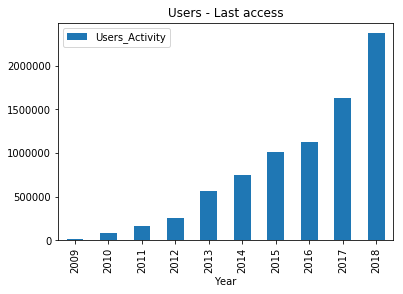

In [0]:
df8[0:10].set_index('Year').plot(kind = 'bar', title = 'Users - Last access')

<Figure size 144x144 with 0 Axes>

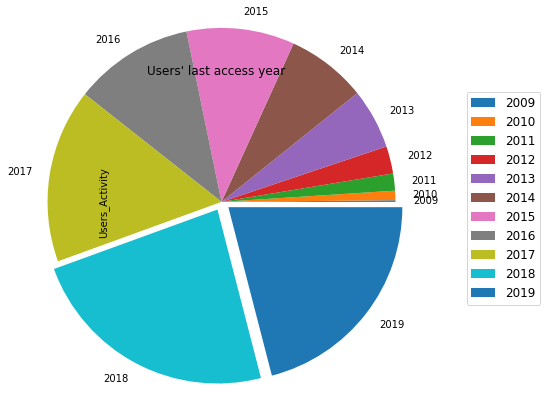

<Figure size 144x144 with 0 Axes>

In [0]:
explode = (0,0,0,0,0,0,0,0,0,0.1,0.1)
df8.set_index('Year').plot(kind = 'pie', title = 'Users\' last access year', subplots=True, radius=2, explode=explode)
plt.legend(loc = 'lower left', fontsize = 12, bbox_to_anchor=(1.6, 0))
plt.figure(figsize=(2, 2))

*Zaangażowanie użytkowników serwisu można cześciowo ocenić na podstawie dat ostatnich logowań. Prawie 1/4 wszystkich użytkowników logowała się w I kwartale tego roku, co świadczy o ich aktywnosci na serwisie - jest to ponad 2 miliony użytkowników. Dodając do tego osoby logujące się w 2018 r., to prawie połowa wszystkich użytkowników. Świadczy to o dużym zaangażowaniu użytkowników w wymianę informacji na portalu. Można też założyć, że użytkownicy, którzy logowali się w I kwartale 2019 r. są tymi najbardziej aktywnymi.*

## *Zaangażowanie użytkowników w działalność serwisu - nominacje na moderatorow* 

In [0]:
query6 = """SELECT 
EXTRACT(YEAR FROM posts_moderator_nomination.creation_date) AS Year,
  COUNT(*) AS Number_of_Nomination
FROM
  `bigquery-public-data.stackoverflow.posts_moderator_nomination` posts_moderator_nomination
JOIN
  `bigquery-public-data.stackoverflow.users` users
ON posts_moderator_nomination.last_editor_user_id = users.id
#WHERE users.location like '%Poland%' OR users.location like '%Polska%'
GROUP BY
  Year
HAVING
  Year > 2008 AND Year <= 2019
ORDER BY
  Year"""

In [0]:
df6 = pd.read_gbq(query = query6, project_id = 'it-job-market-project-cc', dialect = 'standard')
df6.set_index('Year')

,Number_of_Nomination
Year,
2011,119
2012,19
2013,28
2014,32
2015,65
2016,14
2017,16
2018,17


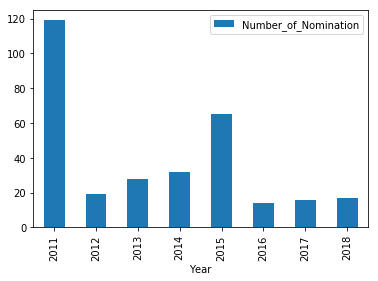

In [0]:
df6.set_index('Year').plot(kind = 'bar')

*Powyższe dane wskazują na ilość zgłoszeń na moderatorów StackOverflow. Największa ilość zgłoszeń miała miejsce w 2011, potem w 2015. Obecnie ilość zgłoszeń się ustabilizowała. Ilość nowych zgłoszeń nie jest duża w stosunku do liczby użytkowników serwisu, co wiązać się może z wymogami co do moderatorów oraz z ich obowiązkami.*

## *Najczęściej pojawiające się tagi na StackOverflow*

In [0]:
queryTagsAll = """
SELECT tag_name, count
FROM `bigquery-public-data.stackoverflow.tags`
ORDER BY
  count DESC
"""

In [0]:
dfAllTags = pd.read_gbq(query = queryTagsAll, project_id = 'it-job-market-project-cc', dialect = 'standard')
dfAllTags.head(10)

,tag_name,count
0,javascript,1769208
1,java,1519552
2,c#,1289429
3,php,1265522
4,android,1176225
5,python,1120872
6,jquery,945635
7,html,806983
8,c++,606864
9,ios,591950


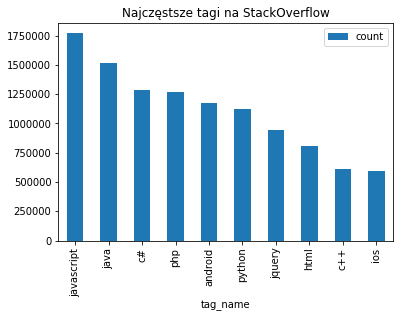

In [0]:
dfAllTags.set_index('tag_name').head(10).plot(kind = 'bar', title = 'Najczęstsze tagi na StackOverflow')

<Figure size 144x144 with 0 Axes>

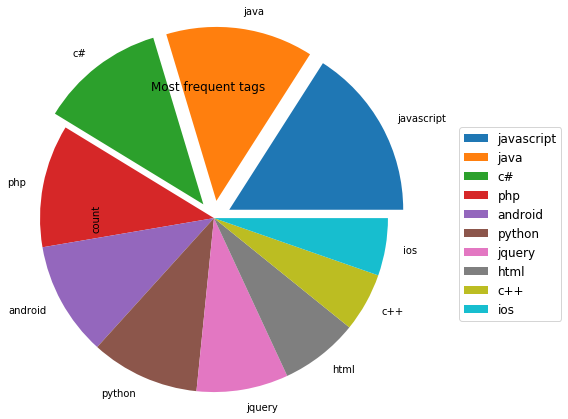

<Figure size 144x144 with 0 Axes>

In [0]:
explode = (0.2,0.2,0.2,0,0,0,0,0,0,0)
dfAllTags.set_index('tag_name')[0:10].plot(kind = 'pie', title = 'Most frequent tags', subplots=True, radius=2, explode = explode)
plt.legend(loc = 'lower left', fontsize = 12, bbox_to_anchor=(1.6, 0))
plt.figure(figsize=(2, 2))

## *Najczęściej pojawiające się tagi w pytaniach na StackOverflow od 2018 r.*

In [0]:
queryTags = """SELECT tags, 
EXTRACT(YEAR FROM creation_date) AS Year
FROM `bigquery-public-data.stackoverflow.posts_questions`
WHERE EXTRACT(YEAR FROM creation_date) >= 2018
ORDER BY
  Year DESC
"""

In [0]:
dfTags = pd.read_gbq(query = queryTags, project_id = 'it-job-market-project-cc', dialect = 'standard')
tagsAll = ' '.join(dfTags.tags).lower()
pdTagsAll = pd.DataFrame(re.split(r'[| ]', tagsAll))

In [0]:
pdTagsAll1 = pd.DataFrame(pdTagsAll.groupby(0)[0].count().sort_values(ascending = False).head(10))
pdTagsAll1

,0
0,
javascript,270124
python,268966
java,191985
android,146681
c#,140532
php,133340
html,104849
angular,73131
css,70967


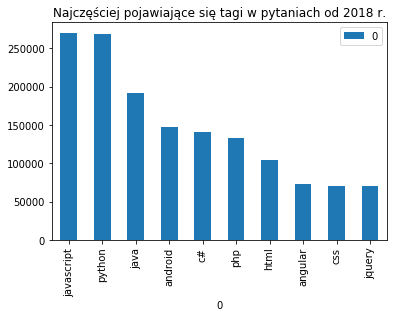

In [0]:
pdTagsAll1.plot(kind = 'bar', title = 'Najczęściej pojawiające się tagi w pytaniach od 2018 r.')

*Na StackOverflow najczęściej pojawiające się tagi dotyczą języków takich jakich jak: java script, java, c#, php. W pytaniach zadawanych na serwisie od 2018 r. jako najczęstsze tagowane są języki: java script, python, java. Widać tutaj rosnące zainteresowanie pythonem, który prawie dogania javascript i z backendu trafia na 1 miejsce i androidem.*

## *Pogłębiona analiza tagów na Stackoverflow*

*Z uwagi na ilość danych w analizie uwzględniono limit 10 000 wierszy.*

*Na podstawie danych dot. postów z pytaniami*

In [0]:
myQuery = """ select id, extract(YEAR from creation_date) as year, tags
  from `bigquery-public-data.stackoverflow.posts_questions`
  #LIMIT 10000
  """

In [0]:
df = pd.read_gbq(query = myQuery, project_id = 'test-it-job-market', dialect = 'standard')

In [0]:
df.head()

,id,year,tags
0,263987,2008,.net|delphi|com|interop|permissions
1,129019,2008,.net|winforms
2,145000,2008,html|xhtml
3,227968,2008,json|asp.net-ajax|telerik
4,29643,2008,multithreading|logging


In [0]:
tags = pd.DataFrame(df.tags.str.split('|').tolist(), index=df.year).stack()

In [0]:
tags.head()

year   
2008  0           .net
      1         delphi
      2            com
      3        interop
      4    permissions
dtype: object

In [0]:
tags = tags.reset_index([0, 'year'])
tags.head()

,year,0
0,2008,.net
1,2008,delphi
2,2008,com
3,2008,interop
4,2008,permissions


In [0]:
tags.columns = ['year', 'tag']

In [0]:
# sprawdzenie, ile jest powtórzeń każdego taga i jakie są tagi
tags.tag.value_counts().head(20)

javascript       1769157
java             1519528
c#               1289419
php              1265498
android          1176198
python           1120815
jquery            945632
html              806973
c++               606848
ios               591942
css               575586
mysql             551652
sql               480824
asp.net           343360
ruby-on-rails     303550
c                 297405
arrays            289019
objective-c       286871
.net              280412
r                 278145
Name: tag, dtype: int64

In [0]:
# ile jest tagów w query
tags.tag.nunique()

54463

### *Dane na temat najpopularniejszych tagów na StackOverflow i zmian ich popularności*

In [0]:
smallertags = tags[tags.tag.isin(['java','javascript','python','c','c++','c#','ruby','php','scala','r','vba','android','ios','sql','objective-c','delphi','pascal','tsql','shell','f#','xml','ruby-on-rails','.net','css'])]

In [0]:
smallertags.head()

,year,tag
0,2008,.net
1,2008,delphi
5,2008,.net
14,2008,java
17,2008,php


In [0]:
tags2008 = smallertags[smallertags.year==2008]
tags2009 = smallertags[smallertags.year==2009]
tags2010 = smallertags[smallertags.year==2010]
tags2011 = smallertags[smallertags.year==2011]
tags2012 = smallertags[smallertags.year==2012]
tags2013 = smallertags[smallertags.year==2013]
tags2014 = smallertags[smallertags.year==2014]
tags2015 = smallertags[smallertags.year==2015]
tags2016 = smallertags[smallertags.year==2016]
tags2017 = smallertags[smallertags.year==2017]
tags2018 = smallertags[smallertags.year==2018]

In [0]:
val2008 = tags2008.tag.value_counts(normalize=True)
val2009 = tags2009.tag.value_counts(normalize=True)
val2010 = tags2010.tag.value_counts(normalize=True)
val2011 = tags2011.tag.value_counts(normalize=True)
val2012 = tags2012.tag.value_counts(normalize=True)
val2013 = tags2013.tag.value_counts(normalize=True)
val2014 = tags2014.tag.value_counts(normalize=True)
val2015 = tags2015.tag.value_counts(normalize=True)
val2016 = tags2016.tag.value_counts(normalize=True)
val2017 = tags2017.tag.value_counts(normalize=True)
val2018 = tags2018.tag.value_counts(normalize=True)

In [0]:
val2009

c#               0.207480
java             0.108054
.net             0.103974
php              0.092119
javascript       0.084348
c++              0.070789
python           0.058127
sql              0.053155
ruby-on-rails    0.031279
css              0.030571
c                0.030504
objective-c      0.028592
xml              0.023859
ruby             0.023454
delphi           0.012099
tsql             0.010836
android          0.008966
vba              0.006049
shell            0.005107
ios              0.002980
scala            0.002777
r                0.002362
f#               0.002294
pascal           0.000225
Name: tag, dtype: float64

In [0]:
val2018

javascript       0.163665
python           0.160354
java             0.115898
android          0.089424
c#               0.084584
php              0.081004
css              0.043080
r                0.040544
c++              0.039135
sql              0.038686
ios              0.036584
c                0.018995
vba              0.016576
ruby-on-rails    0.013170
.net             0.012921
xml              0.010389
scala            0.008789
ruby             0.008630
shell            0.005597
objective-c      0.004808
tsql             0.004362
delphi           0.001787
f#               0.000902
pascal           0.000117
Name: tag, dtype: float64

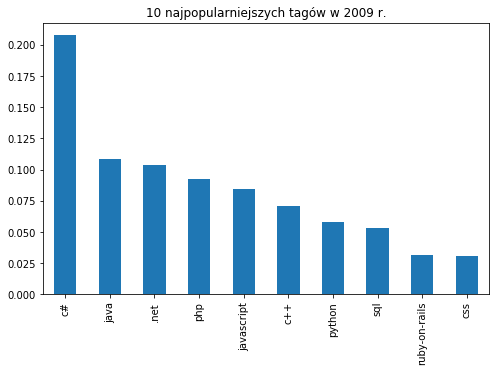

In [0]:
val2009.head(10).plot(kind = 'bar', title = '10 najpopularniejszych tagów w 2009 r.', figsize = [8,5])


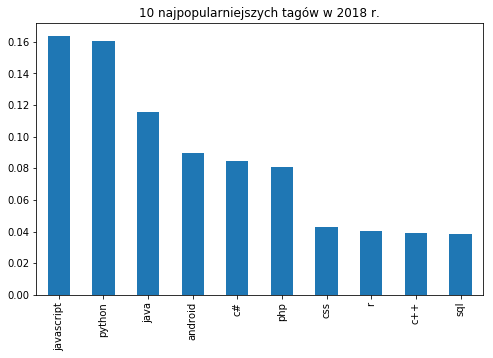

In [0]:
val2018.head(10).plot(kind = 'bar', title = '10 najpopularniejszych tagów w 2018 r.', figsize = [8,5])

In [0]:
val2009df = pd.DataFrame(val2009)
val2018df = pd.DataFrame(val2018)
val2018df.columns = ['procent 2018']
val2009df.columns = ['procent 2009']
val2009df['procent 2018']=val2018df['procent 2018']
valTags2009_2018 = (val2009df*100).sort_values(by = 'procent 2018', ascending = False).head(10)
valTags2009_2018

,procent 2009,procent 2018
javascript,8.434794,16.366462
python,5.812669,16.035384
java,10.805389,11.589784
android,0.896580,8.942436
c#,20.748006,8.458362
php,9.211920,8.100355
css,3.057117,4.307982
r,0.236203,4.054429
c++,7.078880,3.913480
sql,5.315471,3.868623


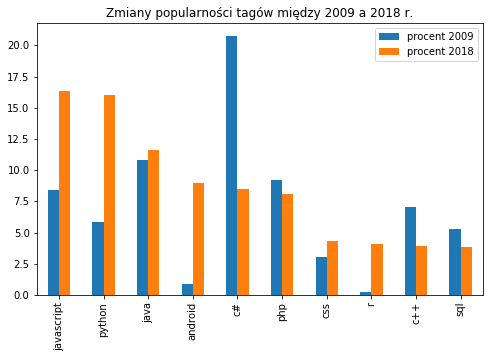

In [0]:
valTags2009_2018.plot(kind = 'bar', title = 'Zmiany popularności tagów między 2009 a 2018 r.', figsize = [8,5])

*Porównując najpopularniejsze tagi na StackOverflow pomiędzy 2009 a 2018 r., widać jak ogromna zmiana zaszła w popularności niektórych języków programowania. W przypadku c# czy c++jest to spadek popularności o około połowę, a dla java script czy python - wzrost o ponad 100 %. Z wykresu widać też, jak stosunkowo nowe w 2009 r. języki (jak r czy android) bardzo zyskały na znaczeniu.*

## *Ilość zadawanych pytań i odpowiedzi na StackOverflow*

In [0]:
queryQA = """SELECT
  EXTRACT(YEAR FROM creation_date) AS Year,
  COUNT(*) AS Number_of_Questions,
  SUM(answer_count) AS Number_of_Answers
FROM
  `bigquery-public-data.stackoverflow.posts_questions`
GROUP BY
  Year
HAVING
  Year > 2008 AND Year <= 2019
ORDER BY
  Year; """

In [0]:
# jednorazowo będzie potrzebne podanie kodu weryfikacyjnego
dfQA = pd.read_gbq(query = queryQA, project_id = 'it-job-market-project-cc', dialect = 'standard')

In [0]:
dfQA

,Year,Number_of_Questions,Number_of_Answers
0,2009,343139,1148668
1,2010,693332,1722921
2,2011,1198587,2532982
3,2012,1642687,3008800
4,2013,2056613,3407852
5,2014,2160361,3171678
6,2015,2214389,3042724
7,2016,2219199,2907726
8,2017,2137687,2656670
9,2018,2168086,2234168


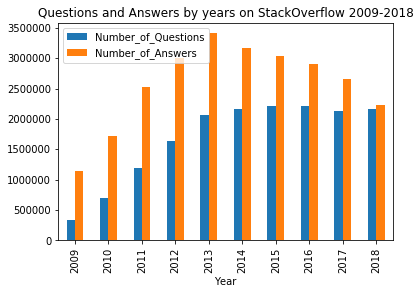

In [0]:
dfQA.set_index('Year')[0:10].plot(kind = 'bar', title = 'Questions and Answers by years on StackOverflow 2009-2018')

*Najwięcej zadawanych pytań pojawiło się na StackOverflow w latach 2015-2016. Od 2016 r. pojawiła się delikatna tendencja malejąca, z roku na rok ilość zadawanych pytań powoli maleje, do potwierdzają również dane za I kw. 2019 r.  Najwięcej odpowiedzi było udzielanych w latach 2012-2014. Od 2014 ilość udzielanych odpowiedzi maleje, co widać też w danych za I kw. 2019 r.*

# Machine learning - trendy na StackOverflow

## *Pytania na StackOverflow dotyczące machine learning*
*Do analizy wybrano tagi związane z machine learnig: tensorflow|scikit-learn|deep-learning|matplotlib|keras|seaborn|pytorch|torch|caffe|theano|caffe2|dl4j|cntk|mxnet|chainer|accord.net|spacy|gensim*

*Dane za 2019 r. dotyczą I kwartału 2019 r.*

In [0]:
q_questions_ml = """SELECT
  accepted_answer_id,
  answer_count,
  EXTRACT (YEAR FROM creation_date) as Year
 FROM
  `bigquery-public-data.stackoverflow.posts_questions`
WHERE
  REGEXP_CONTAINS(tags, r'(tensorflow|scikit-learn|deep-learning|matplotlib|keras|seaborn|pytorch|torch|caffe|theano|caffe2|dl4j|cntk|mxnet|chainer|accord.net|spacy|gensim)')
  """
df_questions_ml = pd.read_gbq(query = q_questions_ml, project_id = 'test-it-job-market', dialect = 'standard')

In [0]:
dfML = pd.DataFrame(df_questions_ml.groupby(by="Year").size())
dfML.columns = ['Ilość pytań zawierających tagi ML']
dfML

,Ilość pytań zawierających tagi ML
Year,
2008,5
2009,86
2010,339
2011,841
2012,1790
2013,3683
2014,5335
2015,8186
2016,16904


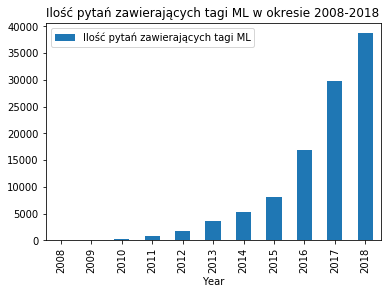

In [0]:
dfML[0:11].plot(kind = 'bar', title = 'Ilość pytań zawierających tagi ML w okresie 2008-2018')

## *Pytania z zakresu ML z zaakceptowaną odpowiedzią - procentowo*
*osoba która zadała pytanie musi zaakceptować odpowiedź - odpowiedź zrealizowała problem zadany w pytaniu i pytający stwierdził: 'działa'*

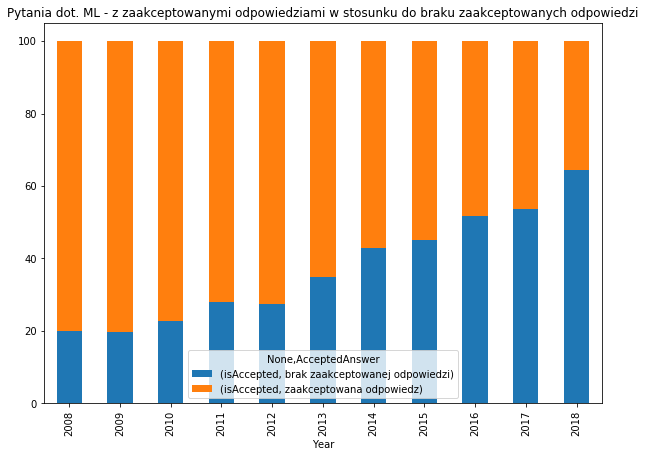

In [0]:
df_questions_ml["AcceptedAnswer"] = np.where(df_questions_ml['accepted_answer_id'].isna(), "brak zaakceptowanej odpowiedzi", "zaakceptowana odpowiedz")
answered_2plot = df_questions_ml.groupby(by='Year')['AcceptedAnswer'].value_counts(normalize = True).to_frame('isAccepted').pivot_table(index = 'Year',columns = 'AcceptedAnswer')
(answered_2plot*100)[0:11].plot.bar(stacked=True, figsize=(10,7), title = 'Pytania dot. ML - z zaakceptowanymi odpowiedziami w stosunku do braku zaakceptowanych odpowiedzi')

## *Pytania z zakresu ML - odpowiedzi*

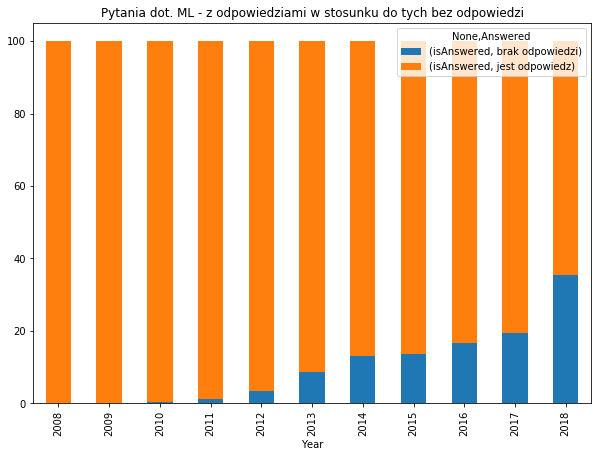

In [0]:
df_questions_ml["Answered"] = np.where(df_questions_ml['answer_count'] == 0, "brak odpowiedzi", "jest odpowiedz")
answer_2plot = df_questions_ml.groupby(by='Year')['Answered'].value_counts(normalize = True).to_frame('isAnswered').pivot_table(index = 'Year',columns = 'Answered')
(answer_2plot*100)[0:11].plot.bar(stacked=True, figsize=(10,7), title = 'Pytania dot. ML - z odpowiedziami w stosunku do tych bez odpowiedzi')

## *Dane na temat komentarzy pod postami o machine learning - zestawienie miesięczne*

In [0]:
q_comm_sum = """SELECT
  EXTRACT(YEAR FROM creation_date) AS Year,
  EXTRACT(MONTH FROM creation_date) AS Month,
  count(*) AS Comments
FROM
  `bigquery-public-data.stackoverflow.comments`
WHERE
  post_id IN (SELECT
  id
FROM
  `bigquery-public-data.stackoverflow.posts_questions`
WHERE
  REGEXP_CONTAINS(tags, r'(tensorflow|scikit-learn|deep-learning|matplotlib|keras|seaborn|pytorch|torch|caffe|theano|caffe2|dl4j|cntk|mxnet|chainer|accord.net|spacy|gensim)')
  )
GROUP BY Year, Month
ORDER BY Year, Month
  """
df_comm_sum = pd.read_gbq(query = q_comm_sum, project_id = 'test-it-job-market', dialect = 'standard')
df_comm_sum = df_comm_sum.set_index(['Year','Month'])
#to dodanie rekordu jest tylko żeby się kolory co pełny rok układały
df_comm_sum = df_comm_sum.set_value((2009,1),'Comments',0)
df_comm_sum = df_comm_sum.sort_index(level=[0,1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



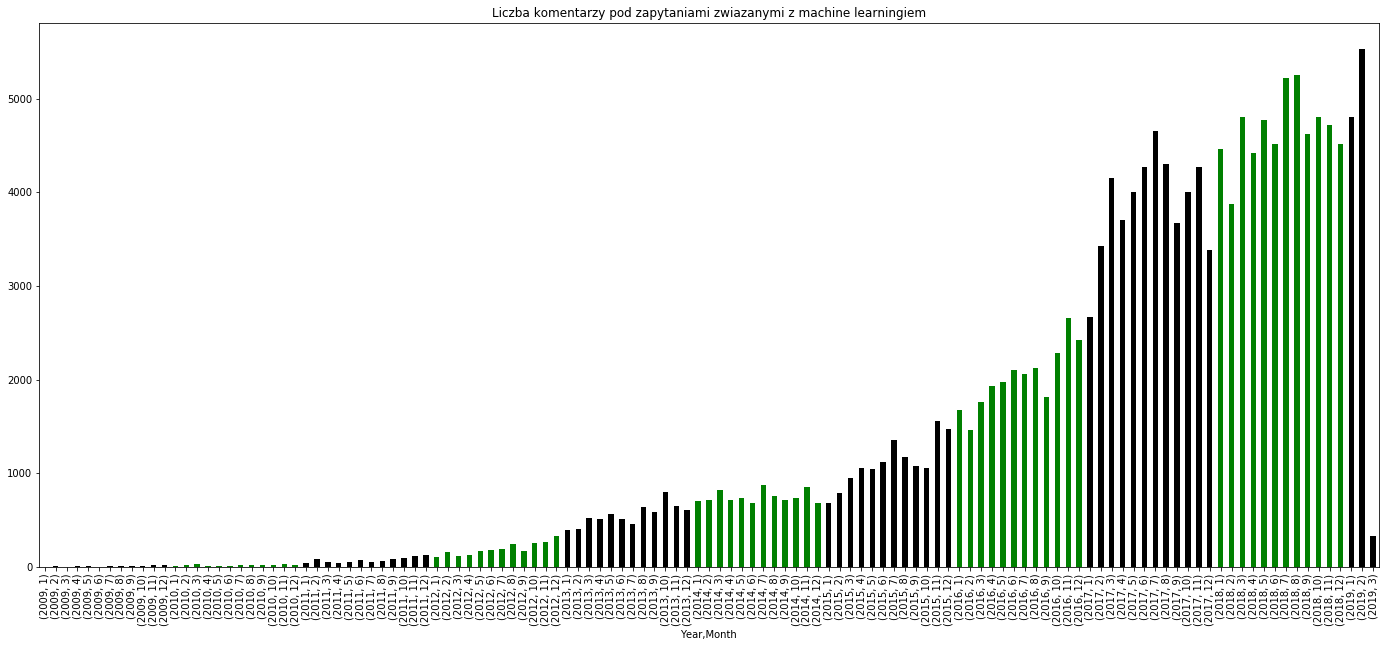

In [0]:
my_colors = 'kkkkkkkkkkkkgggggggggggg'
df_comm_sum.plot(kind="bar", title="Liczba komentarzy pod zapytaniami zwiazanymi z machine learningiem", legend=False, figsize=(24,10), 
                 color =my_colors)

## *Miesięczne porównanie komentarzy dot. machine learning*

In [0]:
q_comm_sum_month = """SELECT
  EXTRACT(MONTH FROM creation_date) AS Month,
  count(*)
FROM
  `bigquery-public-data.stackoverflow.comments`
WHERE
  post_id IN (SELECT
  id
FROM
  `bigquery-public-data.stackoverflow.posts_questions`
WHERE
  REGEXP_CONTAINS(tags, r'(tensorflow|scikit-learn|deep-learning|matplotlib|keras|seaborn|pytorch|torch|caffe|theano|caffe2|dl4j|cntk|mxnet|chainer|accord.net|spacy|gensim)')
  )
GROUP BY Month
ORDER BY Month
  """
df_comm_sum_month = pd.read_gbq(query = q_comm_sum_month, project_id = 'test-it-job-market', dialect = 'standard')
df_comm_sum_month = df_comm_sum_month.set_index('Month')

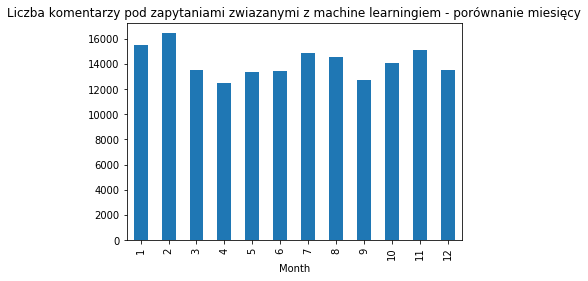

In [0]:
df_comm_sum_month.plot(kind= "bar", title="Liczba komentarzy pod zapytaniami zwiazanymi z machine learningiem - porównanie miesięcy", legend=False)

*Dane na temat tagów dotyczących machine learning w pytaniach zadawanych na StackOverflow wskazują na duży wzrost zainteresowania tym tematem na przestrzeni ostatnich lat. Największy wzrost nastąpił pomiędzy 2016 a 2017 r., co widać po dużym przyroście pytań zawierających tagi związane z ML. Od 2012 r. stopniowo rośnie udział pytań dot. ML, dla których pytający nie zaakceptował odpowiedzi, w 2016 r. ta wielkość przekroczyła 50 % wszystkich pytań, a w 2018 r. 60 %. Rośnie również udział pytań dot. ML, na które nie udzielono odpowiedzi - największy przyrost miał miejsce między 2017 a 2018 r. gdzie z prawie 20 % wzrósł do blisko 40 % wszystkich pytań z tego zakresu. Świadczyć to może o skomplikowaniu tematu oraz o małej ilości aktywnych użytkowników StackOverflow znających się na ML.*
*Miesięczne porównanie ilości komentarzy pod postami dot. ML świadczy o tym, że zainteresowanie tematem ML i zadawanymi pytaniami jest większe na początku roku, oraz - co zaskakujące - w okresie wakacyjnym - może z powodu większej ilości czasu podczas wakacji umożliwiającej użytkownikom śledzenie aktualnych postów na Stacku.*